# Dijkstras algorithm implementation and visualisation

In [261]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import heapq

## Algorithm

In [262]:
def dijkstra(graph, source, destination):
    distances = {vertex: float('infinity') for vertex in graph}
    distances[source] = 0
    priority_queue = [(0, source)]
    previous_vertices = {}

    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)

        if current_distance > distances[current_vertex]:
            continue

        if current_vertex == destination:
            path = []
            distance = distances[current_vertex]

            while current_vertex is not None:
                path.insert(0, current_vertex)
                current_vertex = previous_vertices.get(current_vertex, None)

            return (path, distance)

        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_vertices[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))
                
    return ([], 0)


##   Load data from boards.txt

In [263]:
boards = []
with open("boards.txt", 'r') as handle:
        number = int(handle.readline().strip())
        for i in range(number):
            y = int(handle.readline().strip())
            board = []
            for i in range(y):
                board.append(handle.readline().strip().split())
            boards.append(board)

## Function to turn data into graphs

In [264]:
def turn_into_graph(board):
    graph = {}
    for y in range(len(board)):
        for x in range(len(board[0])):
            edges = {}
            if y > 0:
                edges[(x, y - 1)] = int(board[y - 1][x])
            if y < len(board) - 1:
                edges[(x, y + 1)] = int(board[y + 1][x])
            if x > 0:
                edges[(x - 1, y)] = int(board[y][x - 1])
            if x < len(board[0]) - 1:
                edges[(x + 1, y)] = int(board[y][x + 1])
            graph[x, y] = edges
    return graph

## Visualisation

In [265]:
def visualize_board_and_path(ax, test_case, source, destination):
    graph = turn_into_graph(test_case)
    shortest_path, distance = dijkstra(graph=graph, source=source, destination=destination)
    board_array = np.array(test_case, dtype=float)

    im = ax.imshow(board_array, cmap='terrain', interpolation='nearest')
    
    if shortest_path:
        path_x = [coord[0] for coord in shortest_path] 
        path_y = [coord[1] for coord in shortest_path] 
        ax.plot(path_x, path_y, marker='o', color='red', linewidth=2, markersize=5, label='Shortest Path')

    ax.annotate('Source', source, textcoords="offset points", xytext=(0,10), ha='center', fontsize=20, color='black')
    ax.annotate('Destination', destination, textcoords="offset points", xytext=(0,10), ha='center', fontsize=20, color='black')
    ax.set_title(f'Path Length: {distance}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    plt.colorbar(im, ax=ax, label='Weight')
    ax.legend()

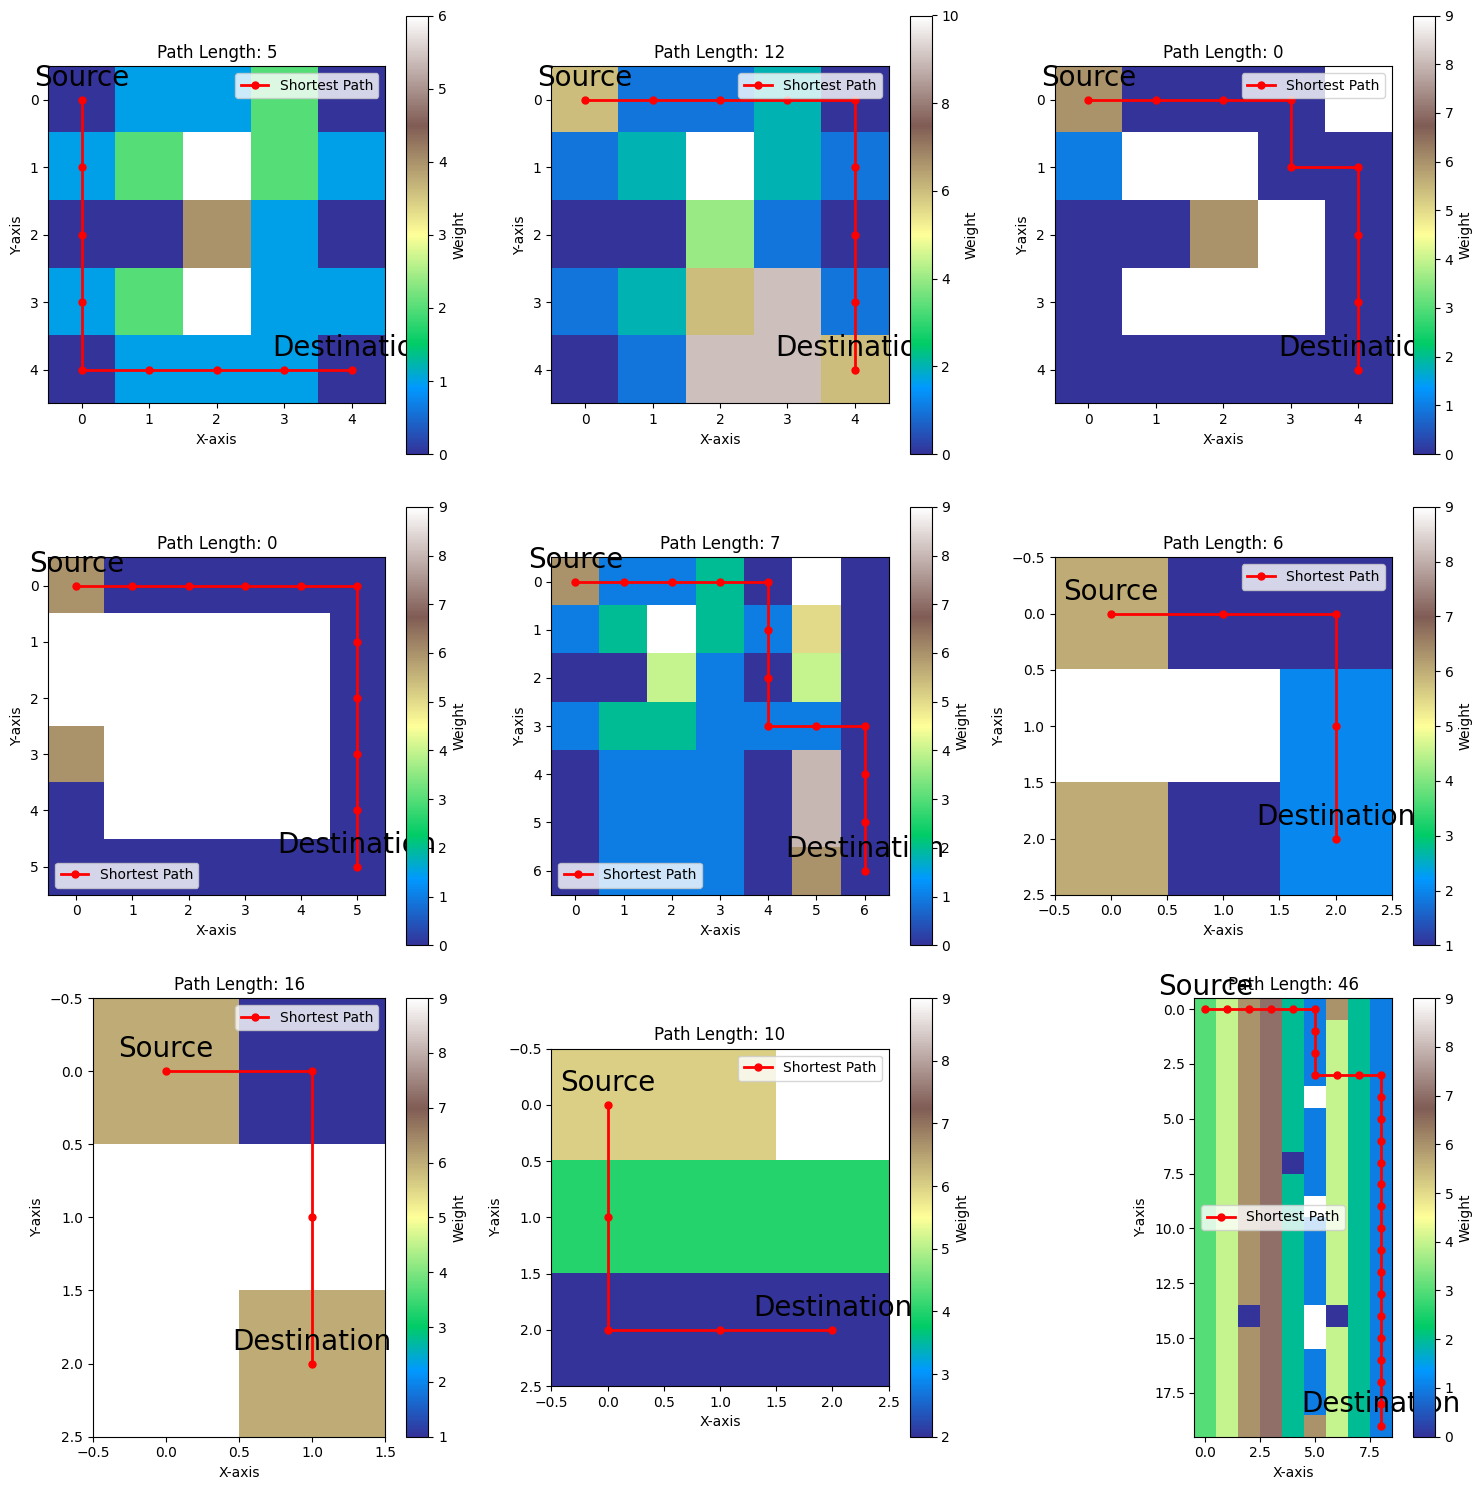

In [266]:
test_cases = load_from_file('boards.txt')
# Visualize all test cases in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axs.flat):
    if i < len(test_cases):
        test_case = test_cases[i]
        dest = (len(test_case[0]) - 1, len(test_case) - 1)
        visualize_board_and_path(ax, test_case, source=(0, 0), destination=dest)

plt.tight_layout()
plt.show()